# Project Name:Credit card fradulant transactions

## **1.   Problem Defnition**

> The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be a fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.
## **2.   Dataset**
> ## **2.1  [creditcard.csv](https://drive.google.com/file/d/1_SvtUDzq94K8fDzzmYXY3EEwtoiMVHrm/view?usp=sharing)**
>>**2.1.1 Dataset description:**    

>>The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

>>It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

>>**2.1.2 Preprocessing:**

>>This data set contains 28 columns obtained from principal component analysis.remaining are time between consecutive transactions and Amount. These columns time and amount are scaled. No null values are detected. This dataset is imbalenced with the count of fraud-492, and non fraud-284315.
>>a dataset is created sample of 492 non-fraud along with all fraud is taken to visualize and identify the model

## **3 Implementation**

> ## **3.1 Imports**
>>->pandas to handle data frames

>>->NumPy is a python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

>>->train_test_split is used for spliting data into test and train with balenced class variable 

>>->accuracy_score is used for calculatng accuracy

>>->pyplot for visualisaton

>>->we are applying three models LogsticRegression, svm , decisiontreeclassfier

>>->cross_val_score for class validation

>>->sns for visualization



In [1]:
import pandas as pd 
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


> ## **3.2 Reading data csv file**

In [2]:
d = pd.read_csv("/content/gdrive/My Drive/creditcard.csv")

In [3]:
d.shape

(284807, 31)

In [4]:
d.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


> ## **3.3 Features V1, V2, … V28 are the principal components obtainedwith PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount' and needs to be stranderdised.**

In [5]:
d['sAmount'] = RobustScaler().fit_transform(d['Amount'].values.reshape(-1,1))
d['sTime'] = RobustScaler().fit_transform(d['Time'].values.reshape(-1,1))


In [6]:
d.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,sAmount,sTime
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291,-0.994972
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579,-0.994960


In [7]:
d.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,sAmount,sTime
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727,0.927124,0.118914
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,3.495006,0.557903
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,-0.307413,-0.994983
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,-0.229162,-0.358210
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,0.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,0.770838,0.641790
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,358.683155,1.035022


> ## **3.4 Checking for null values** 

In [8]:
d.isnull().sum()

Time       0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
Amount     0
Class      0
sAmount    0
sTime      0
dtype: int64

> ## No null values. if null values are there we can repalce them with mean of the column




> ## **3.5 Observations on class variable**

In [9]:
df=pd.DataFrame({'class':[0,1],'count':[d['Class'].value_counts()[0],d['Class'].value_counts()[1]]})

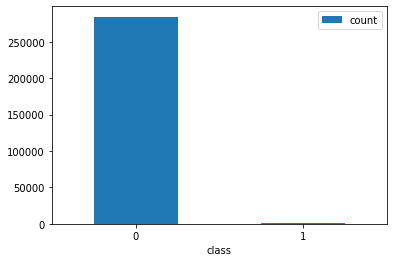

In [10]:
df.plot.bar(x='class',y='count',rot=0)

> ## Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud.

> ## **3.6 distplot for time and Amount**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


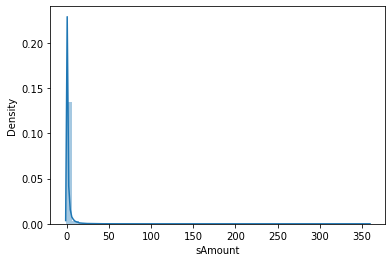

In [11]:
sns.distplot(d['sAmount'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


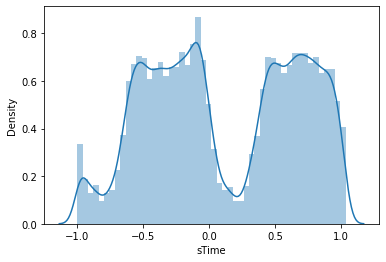

In [12]:
sns.distplot(d['sTime'])

> ## **3.7 droppng orginal time and Amount** 

> We will feed the model with the standerdised time and Amount

In [13]:
d.drop('Time',axis=1,inplace=True)

In [14]:
d.drop('Amount',axis=1,inplace=True)

In [15]:
d.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,sAmount,sTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [16]:
d.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,sAmount,sTime
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727,0.927124,0.118914
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,3.495006,0.557903
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-0.307413,-0.994983
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-0.229162,-0.358210
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,0.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,0.770838,0.641790
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,358.683155,1.035022


> ## **3.8 Correlatonal MAtrix**

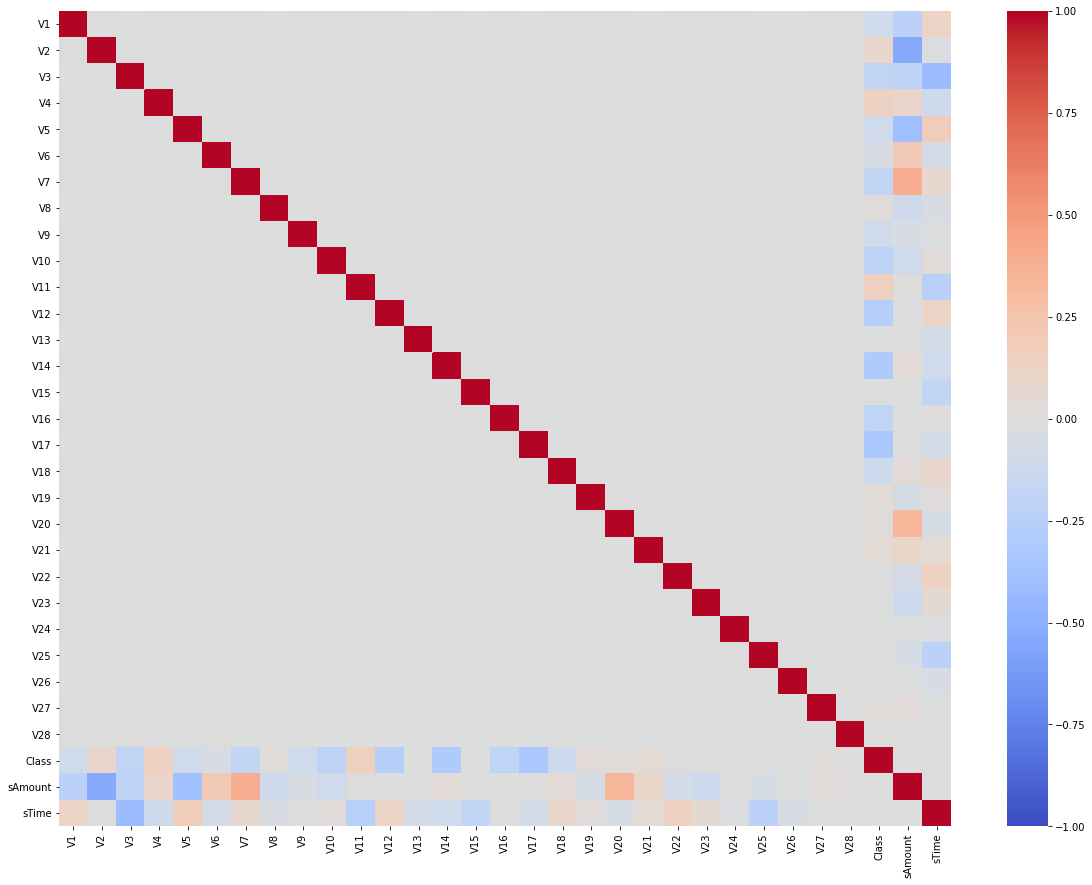

In [17]:
plt.subplots(figsize=(20,15))
sns.heatmap(d.corr(), vmin=-1, vmax=1, center= 0,cmap='coolwarm')

## our correlation matrix is affected by the high imbalance between our classes. We can balence the set by taking equal fraud and non-fraud

> ## **3.9 Balncing data set with Undersampling**

In [18]:
d['Class'].value_counts()[1]

492

In [19]:
d.sample(frac=1)
d1=d.loc[d['Class']==1]

In [20]:
d1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,sAmount,sTime
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.307413,-0.990214
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,7.084469,-0.989438
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,3.045204,-0.942563
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,0.517013,-0.912910
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.293440,-0.906648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1,5.142178,0.992140
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1,-0.296793,0.994549
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1,0.780968,0.994596
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1,3.116048,1.001821


In [21]:
d2=d.loc[d['Class']==0]

In [22]:
d3=d.sample(492)

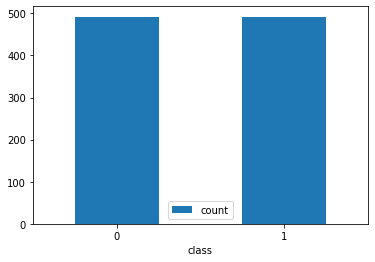

In [23]:
d_new=pd.concat([d1,d3])
df=pd.DataFrame({'class':[0,1],'count':[d_new['Class'].value_counts()[0],d_new['Class'].value_counts()[1]]})
df.plot.bar(x='class',y='count',rot=0)

In [24]:
d_new.sample(frac=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,sAmount,sTime
143728,-1.756712,3.266574,-4.153388,3.924526,-1.753772,-1.005787,-4.313217,1.560712,-3.295674,-6.213355,4.522992,-6.652844,-0.124685,-8.604486,0.110359,-5.945481,-9.338938,-2.390193,3.184152,0.874720,0.911427,0.053061,-0.367701,-0.776338,0.292094,0.026000,1.062968,0.501148,1,-0.293440,0.010350
6641,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,-3.944238,6.355078,-7.309748,0.748451,-9.057993,-0.648945,-1.073117,1.524501,1.831364,-0.089724,0.483303,0.375026,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1,-0.293440,-0.899012
14104,1.192396,1.338974,-0.678876,3.123672,0.643245,-1.184323,0.397586,-0.253499,0.411135,-0.859862,1.124059,-3.763874,0.367976,-0.971758,-0.013883,1.457579,2.611450,1.291955,-1.563815,-0.185455,-0.377503,-0.889597,-0.074208,0.035446,0.550578,-0.027171,-0.024921,0.073605,1,-0.263816,-0.700161
190555,-0.518556,2.044771,-1.077266,2.785285,1.925948,0.354137,0.742371,0.674251,-1.925781,-0.404623,-0.541603,-1.538618,-1.842205,-1.777644,-1.511921,2.369676,0.873890,1.676000,-1.136853,-0.326993,-0.292494,-1.127918,-0.028035,-1.812840,-0.852909,-0.402781,0.083166,0.188252,0,-0.227486,0.519156
159701,1.984200,-0.198453,-1.617140,-0.123905,0.242618,-0.832859,0.264134,-0.181783,0.311989,0.116963,1.038494,0.653522,-0.766164,0.932852,0.102540,0.025678,-0.625845,0.000103,0.399174,-0.162268,-0.087220,-0.359825,0.245667,0.738396,-0.129244,-0.213754,-0.075073,-0.057896,0,0.251520,0.330537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150660,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,-12.965481,8.688308,-17.182918,0.069577,-14.116156,0.959032,-12.375334,-18.716765,-6.522015,3.517955,0.483930,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,1,0.319989,0.107626
98917,-0.517959,0.844588,1.610365,-0.134434,-0.061282,-0.248919,0.441991,0.285965,-0.458720,-0.148176,1.460661,0.034999,-1.529598,0.662316,0.540616,0.110129,-0.210435,-0.197169,-0.122917,-0.016053,-0.150157,-0.446752,0.043198,0.165701,-0.371286,0.075505,0.268090,0.106589,0,-0.232236,-0.209377
128427,-1.627803,0.503815,1.831680,0.144113,0.348563,-0.421558,-0.148681,0.631634,-0.856626,-0.795065,0.659745,0.859150,0.505207,0.411062,-0.113328,0.974462,-1.037630,0.924701,-0.737627,0.030924,0.349722,0.569822,-0.417820,0.029962,0.604956,-0.340047,-0.055607,-0.111132,0,-0.188640,-0.070337
156988,0.745153,2.809299,-5.825406,5.835566,0.512320,-0.615622,-2.916576,0.776710,-1.878832,-4.546936,4.698795,-8.507786,0.718249,-7.628710,-2.249578,-2.558669,-5.304624,-0.956938,-0.585322,0.402837,0.284841,-0.874383,-0.083995,-0.651442,0.454594,0.050376,0.756953,0.383869,1,-0.307413,0.289066


> ## **3.10 Correlational Matrix With balenced Dataset**

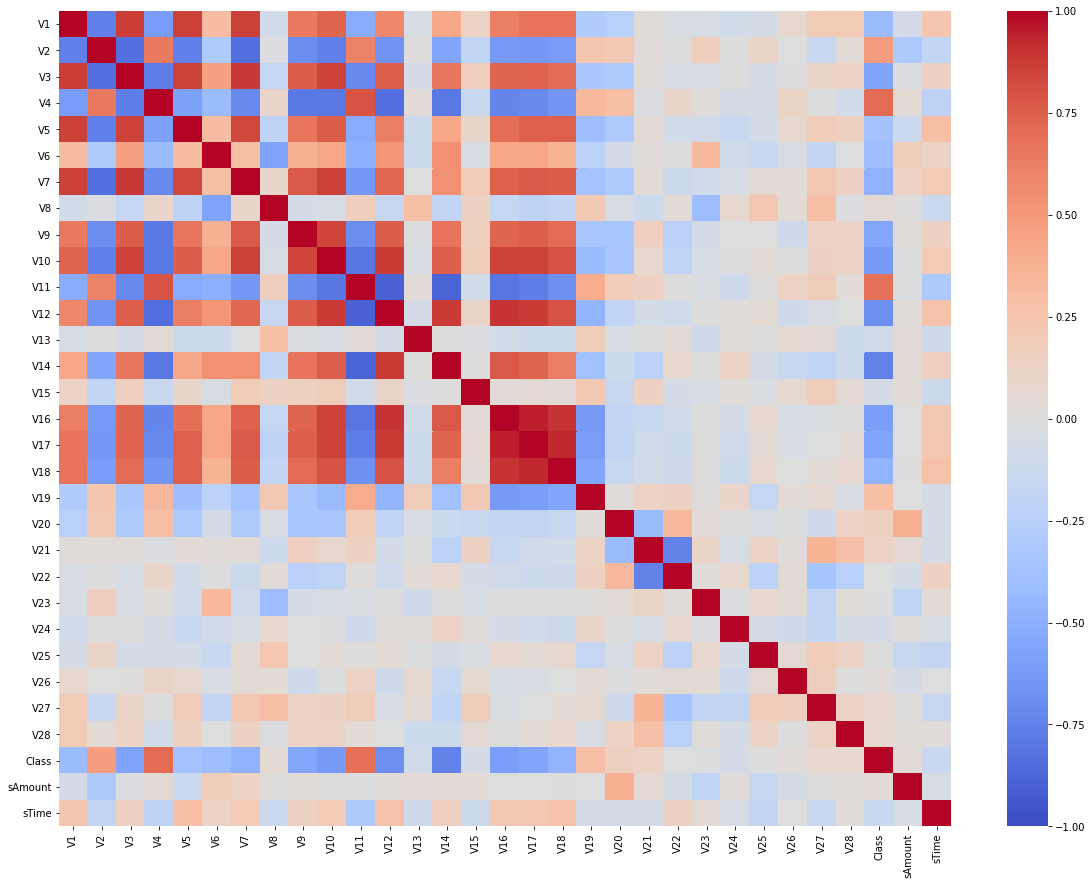

In [25]:
plt.subplots(figsize=(20,15))
sns.heatmap(d_new.corr(), vmin=-1, vmax=1, center= 0,cmap='coolwarm')

## We can observe v1,v3,v7,v9,v10,v12,v14,v16,v17 are negitively corelated with class.
## similarly v2,v4,v11,v19 are positively corelated. We will draw box plots for more observation to above negitively and poitively corelated features 

> ## **3.11 Box Plots**

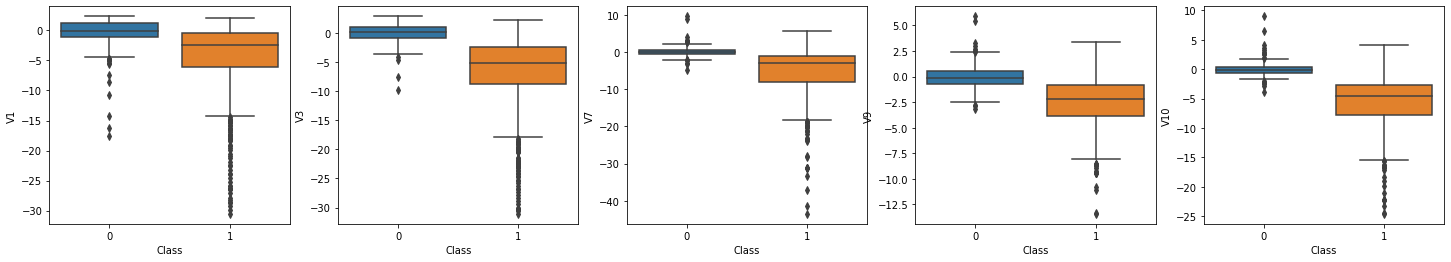

In [26]:
f, axes = plt.subplots(ncols=5, figsize=(25,4))
sns.boxplot(x='Class',y='V1',data=d_new,ax=axes[0])
sns.boxplot(x='Class',y='V3',data=d_new,ax=axes[1])
sns.boxplot(x='Class',y='V7',data=d_new,ax=axes[2])
sns.boxplot(x='Class',y='V9',data=d_new,ax=axes[3])
sns.boxplot(x='Class',y='V10',data=d_new,ax=axes[4])



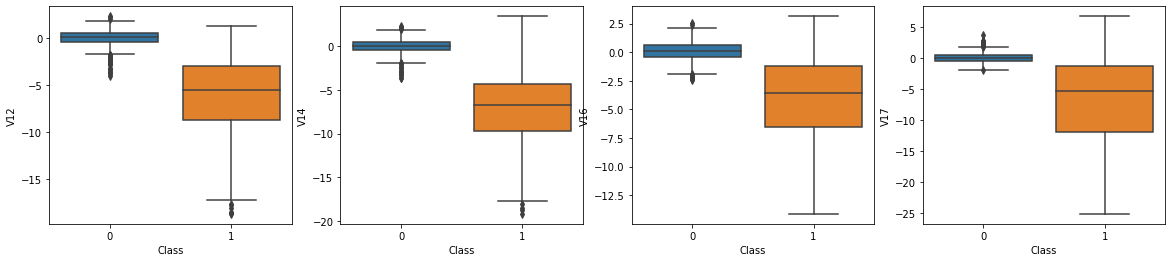

In [27]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x='Class',y='V12',data=d_new,ax=axes[0])
sns.boxplot(x='Class',y='V14',data=d_new,ax=axes[1])
sns.boxplot(x='Class',y='V16',data=d_new,ax=axes[2])
sns.boxplot(x='Class',y='V17',data=d_new,ax=axes[3])

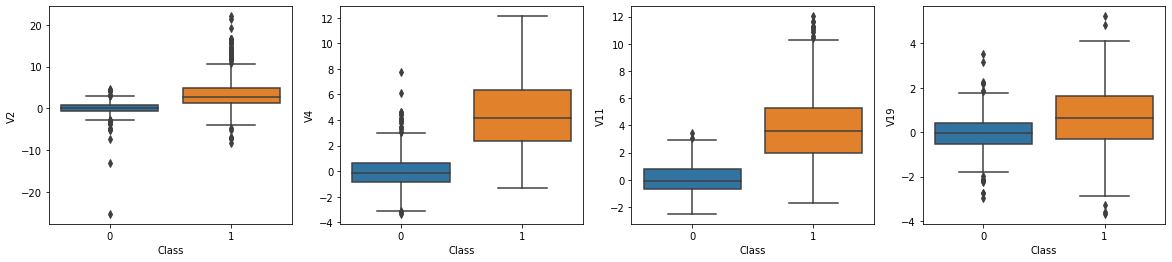

In [28]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x='Class',y='V2',data=d_new,ax=axes[0])
sns.boxplot(x='Class',y='V4',data=d_new,ax=axes[1])
sns.boxplot(x='Class',y='V11',data=d_new,ax=axes[2])
sns.boxplot(x='Class',y='V19',data=d_new,ax=axes[3])

## As we can see, for negitively corelated features we can see the mean for non fradualant class is higher than the fradualant class and vice verse with positively corelated features

> ## **3.12 Splitting Data into Train and test**

In [29]:
X = d_new.drop('Class', axis=1)
y = d_new['Class']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print("non fradulant in train:",y_train.value_counts()[0])
print("fradulant in train:",y_train.value_counts()[1])
print("non fradulant in test:",y_test.value_counts()[0])
print("fradulant in test:",y_test.value_counts()[1])


non fradulant in train: 394
fradulant in train: 393
non fradulant in test: 98
fradulant in test: 99


> ## **3.13 Training Data with Logistic Regression** 

>> # 3.13.1 Traning Model with train data  

In [32]:

model=LogisticRegression(tol = 0.1,max_iter=1500)

In [33]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

>> # 3.13.2 Crossvalidating model with traindata

In [34]:
a = cross_val_score(model, X_train, y_train, cv = 5, scoring = "accuracy")
a.mean()

0.9338950253970815

>> # 3.13.3 Predicting class variable and finding accuracy

In [35]:
a=model.predict(X_test)

In [36]:
print("accuracy:", accuracy_score(y_test,a))

accuracy: 0.9441624365482234


>> # 3.13.4 Plotting confusion matrix to see how many actual fraudulents are classifed as non-fradulents

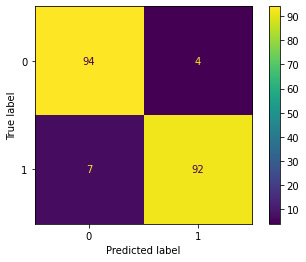

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)

> ## **3.14 Training Data with SVM Classifier** 

>> # 3.14.1 Traning Model with train data  

In [38]:
model=svm.LinearSVC(dual=False,max_iter=120000)
model.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=120000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

>> # 3.14.2 Crossvalidating model with traindata

In [39]:
a = cross_val_score(model, X_train, y_train, cv = 5, scoring = "accuracy")
a.mean()

0.9351689107473998

>> # 3.14.3 Predicting class variable and finding accuracy

In [40]:
a=model.predict(X_test)

In [41]:
print("accuracy:", accuracy_score(y_test,a))

accuracy: 0.949238578680203


>> # 3.14.4 Plotting confusion matrix to see how many actual fraudulents are classifed as non-fradulents

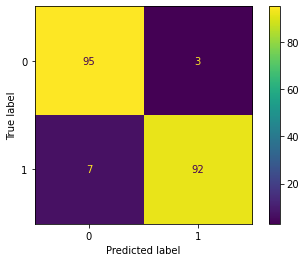

In [42]:
plot_confusion_matrix(model, X_test, y_test)

> ## **3.15 Training Data with DecisionTreeClassifier** 

>> # 3.15.1 Traning Model with train data  

In [43]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

>> # 3.15.2 Crossvalidating model with traindata

In [44]:
a = cross_val_score(model, X_train, y_train, cv = 5, scoring = "accuracy")
a.mean()

0.911037652180924

>> # 3.15.3 Predicting class variable and finding accuracy

In [45]:
a=model.predict(X_test)
print("accuracy:", accuracy_score(y_test,a))

accuracy: 0.8934010152284264


>> # 3.15.4 Plotting confusion matrix to see how many actual fraudulents are classifed as non-fradulents

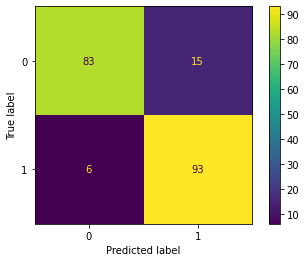

In [46]:
plot_confusion_matrix(model, X_test, y_test)

# Logistc Regression is performing best compared to other models in terms accuracy as well as false negitives

> ## **3.16 Logistic Regression Implementation**

In [115]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
n=X_train.shape[1]
m=X_train.shape[0]
#print(X_train.shape)
#print(m)
w=np.random.randn(n,1)*0.01 #weights
b=0 #bias
y_train1=pd.DataFrame(np.array(y_train))
number_of_iterations=1000
learning_rate=0.02
for i in range(number_of_iterations):
  #print(X_train.shape)
  #print(w.shape)
  b_s=[]
  for i in range(787):
    b_s.append(b)
  b_s=pd.DataFrame(b_s)
  y_predicted=sigmoid(np.dot(X_train,w)+b_s)
  #print(y_predicted.shape)
  cost=(1/m)*np.sum(y_train1*np.log(y_predicted)+(1-y_train1)*np.log(1-y_predicted))
  dw=(1/X_train.shape[0])*np.dot(X_train.T,(y_predicted-y_train1))
  db=(1/X_train.shape[0])*np.sum(y_predicted-y_train1)
  w=w-learning_rate*dw
  #print(w.shape)
  b=b-learning_rate*db

In [118]:
b_s=[]
for i in range(197):
  b_s.append(b)
b_s=pd.DataFrame(b_s)
y_predict=sigmoid(np.dot(X_test,w)+b_s)
y_predict=y_predict>0.5
print(y_predict.shape)
y_new=[]
for i in y_predict:
  y_new.append(int(i))
print("accuracy:", accuracy_score(y_test,y_predict))

(197, 1)
accuracy: 0.9390862944162437
